# Exploring seismic stations in Antarctica

[![Open In Colab](https://img.shields.io/badge/open%20in-Colab-b5e2fa?logo=googlecolab&style=flat-square&color=ffd670)](https://colab.research.google.com/github/tsonpham/ObsSeisHUS2025/blob/master/Day1/D1_Prac.ipynb)

Prepared by Thanh-Son Pham (thanhson.pham@anu.edu.au), April 2025.

---
## What we do in this notebook:
- Learn Jupyter notebook and google colab server
- Plot geographical maps and geoscientific data
- Download station/earthquake metadata from remote servers

Similar to the in-class excercise, here we practise the mapping skils by exploring the network of passive seismometers in Antarctica.

In [2]:
# set up colab environment - uncomment the next line if running in colab

!pip install basemap obspy basemap-data-hires rasterio gdown

In [3]:
#@title Run to activate retina display

%config InlineBackend.figure_format = "retina"
from matplotlib import rcParams

rcParams["savefig.dpi"] = 100
rcParams["figure.dpi"] = 100
rcParams["font.size"] = 10

---
## Fetch station metadata from IRIS server

First, we query the all stations available below 60° south from 2000 to now from the IRIS Data Management Center (https://ds.iris.edu/ds/nodes/dmc/). Most certainly that these retrieved stations are in Antarctica because it is the only landmark beyond 60° south.

In [4]:
from obspy import UTCDateTime
from obspy.clients.fdsn import Client

## Client connected to the IRIS Data Management Center
iris = Client("IRIS")

## Get all stations south of 60 degrees latitude
inv = iris.get_stations(minlatitude=-90, maxlatitude=-60, minlongitude=-180, maxlongitude=180, starttime=UTCDateTime(2000,1,1))

## For convenience, you can also use the virtual network code "_ANTARCTICA" to get all stations in the Antarctic virtual network.
# inv = iris.get_stations(network="_ANTARCTICA", starttime=UTCDateTime(2000,1,1))

## Print the%config matplotlib.inline = 'retina' inventory to check the contents
for net in inv:
    print (f"{net.code} | {net.start_date.date} to {'present' if net.end_date is None  else net.end_date.date}: {net.description}")

1D | 2010-01-01 to 2011-12-31: Elevation change anomalies in West Antarctica and dynamics of subglacial water beneath ice streams and their tributaries (Whillans/UCSC)
1D | 2016-01-01 to 2018-12-31: UKANET: UK Antarctic Network (UKANET)
1G | 2022-01-01 to 2028-12-31: Erebus Backbone Network (EBN)
1J | 2018-01-01 to 2019-12-31: Totten Glacier Active and Passive Source Experiment (Totten Glacier 2018-19)
2A | 2017-01-01 to 2019-12-31: Sorsdal_Glacier_17-18 (Sorsdal)
2C | 2010-01-01 to 2011-12-31: Geophysical Study of Ice Stream Stick-slip dynamics (Whillans Ice Stream)
2H | 2016-01-01 to 2025-12-31: Interim Broadband Monitoring of the Mount Erebus Volcano (Erebus Interim)
4A | 2008-01-01 to 2008-12-31: Investigating mechanisms of subglacial hydrology and basal shear stress beneath Whillans Ice Stream using passive seismology (Whillans Ice Sheet)
5K | 2019-01-01 to 2020-12-31: Kamb Ice Stream Outlet Channel (KambSeis)
6L | 2019-01-01 to 2020-12-31: BEAMISH 2019-20, Rutford Ice Stream, Wes

---
## Plot Antarctica map with the high latitude stereographic projection

Stereographic [projection](https://matplotlib.org/basemap/stable/users/stere.html) is a conformal projection which is suitable for regional map at high latitudes. Polar steoreographic [projections](https://matplotlib.org/basemap/stable/users/pstere.html), including north pole and south pole stereoprojections are convenient way to plot maps of the polar regions.

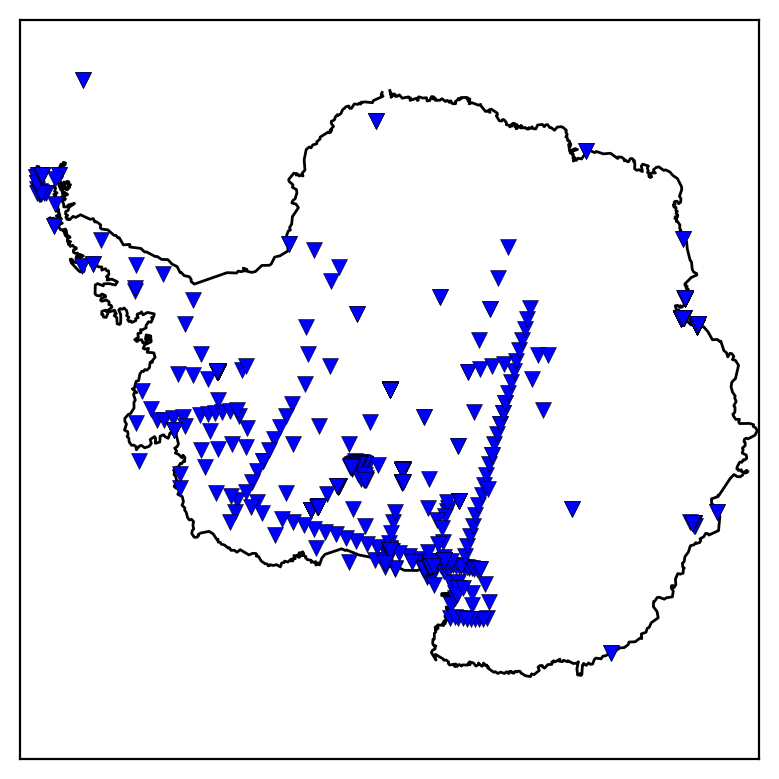

In [5]:
# import a general plotting library
import matplotlib.pyplot as plt
# import basemap toolkit for geographic plotting
from mpl_toolkits.basemap import Basemap

## Create a map of the Antarctic region at low resolution.
# The resolution can be set to 'c' for crude, 'i' for intermediate, 'h' for high resolution
# If an error with 'i' or 'h', you probably need to install `pip install geographiclib`
m = Basemap(projection='spstere', boundinglat=-65, lon_0=180, resolution='l')

## Draw the Antarctic coastline, whose level of details depends on the resolution parameter above.
m.drawcoastlines()

## Draw the latitude and longitude grid
# m.drawparallels(range(-90, -60, 5), labels=[0,0,0,0], maxlat=-89) # Draw the latitude grid every 5 degrees
# m.drawmeridians(range(-180, 180, 30), labels=[0,0,0,0], maxlat=-89) # Draw the longitude grid every 30 degrees

## Plot the location of the stations in the inventory
# To do this, first we need to collect the latitude and longitude of all stations into two lists
stlo = []
stla = []
for net in inv:
    for sta in net:
        stlo.append(sta.longitude)
        stla.append(sta.latitude)
# Then we plot the stations on the map using the plot() function with `latlon=True` to indicate that the coordinates are in latitude and longitude
m.plot(stlo, stla, 'bv', latlon=True, mec='k', mew=0.2) # 'bv' means blue color, triangle shape

## Show the map
plt.show()

Now, we want to make the map more informative by denoting significant networks with markers of different shapes and colors.

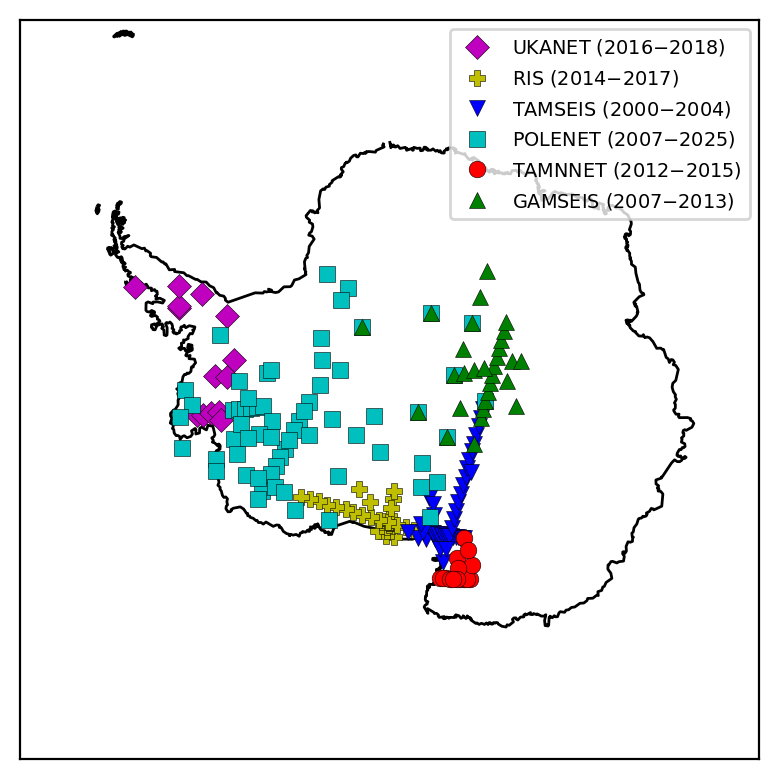

In [6]:
## Define a tuple of major networks' abbreviations
networks = [
    'TAMSEIS', # A Broadband Seismic Investigation of Deep Continental Structure Across the East-West Antarctic Boundary
    'GAMSEIS', # A Broadband Seismic Experiment to Image the Lithosphere beneath the Gamburtsev Mountains, East Antarctica
    'TAMNNET', # Transantarctic Mountains Northern Network
    'POLENET', #IPY POLENET-Antarctica: Investigating links between geodynamics and ice sheets
    'UKANET', # UKANET: UK Antarctic Network
    'RIS' # Collaborative Research: Collaborative Research: Dynamic Response of the Ross Ice Shelf to Ocean Waves and Structure and Dynamics of the Ross Sea from a Passive Seismic Deployment on the Ross Ice Shelf (Ross Ice Shelf (RIS))
]

markers = ['bv', 'g^', 'ro', 'cs', 'mD', 'yP']

## Create a map of the Antarctic region at low resolution.
m = Basemap(projection='spstere', boundinglat=-60, lon_0=180, resolution='l')
## Draw the Antarctic coastline, whose level of details depends on the resolution parameter above.
m.drawcoastlines()
## Plot the location of the stations in the inventory
for net in inv:
    # Collect station geographical coordinates
    stla = [sta.latitude for sta in net]
    stlo = [sta.longitude for sta in net]
    # Check if the network is in the list of major networks
    for ii, network in enumerate(networks):
        if f"({network})" in net.description:
            m.plot(stlo, stla, markers[ii], latlon=True, mec='k', mew=0.2,
                    label=f"{network} ({net.start_date.year}$-${net.end_date.year})")
            break
        # else:
        #     m.plot(stlo, stla, 'o', c='gray', latlon=True, mec='k', mew=0.2, label="Other Networks")
## Add a legend outside the plot area
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper right', fontsize='x-small')

## Show the map
plt.show()

---
## Map with custom background

So far, we have been ploting locations of seismic stations or earthquakes on a map. Here, we will look at ways to plot gridded data as the map background.

In preparation for the plot, we download an open dataset of ice thickness in Antarctica.

In [7]:
import gdown, zipfile
from pathlib import Path
## Download the Bedmap2 datasets in GeoTIFF format from Google Drive using gdown
url = "https://drive.google.com/uc?id=1ATA4rtPqOGxThPpw-DoOP6BeIRXpKzRo"
if not Path('bedmap2_datasets.zip').exists():
    gdown.download(url, 'bedmap2_datasets.zip', quiet=False)
## Unzip the downloaded file
if not Path('bedmap2_datasets').exists():
    with zipfile.ZipFile('bedmap2_datasets.zip', 'r') as f:
        f.extractall('.')

Downloading...
From (original): https://drive.google.com/uc?id=1ATA4rtPqOGxThPpw-DoOP6BeIRXpKzRo
From (redirected): https://drive.google.com/uc?id=1ATA4rtPqOGxThPpw-DoOP6BeIRXpKzRo&confirm=t&uuid=ebb3b34c-413f-4d56-b9e9-41aeb1643464
To: /content/bedmap2_datasets.zip
100%|██████████| 70.8M/70.8M [00:01<00:00, 45.3MB/s]


    Each dataset is projected in Antarctic Polar Stereographic projection, latitude of true scale -71 degrees south, datum WGS84.
    All heights are in metres relative to sea level as defined by the g104c geoid.

    The grid dimensions are 6667 x 6667 cells and the extent is:
    Top: 3333500
    Left: -3333500
    Right: 3333500
    Bottom: -3333500

    The bedmap2 grid spacing is 1000 m.

The following function read geoscientific data in geotiff format into numpy array. `lon` and `lat` matrices have each pixel cooridnates of the entire dataset.

In [8]:
import numpy as np

def read_tiff_data(fname, with_coordinates=False, decimate=4):
    '''
    Read a GeoTIFF file and return the data as a numpy array.
    If with_coordinates is True, return the coordinates as well.
    '''
    # check if the file exists
    import rasterio
    with rasterio.open(fname) as src: # open the tiff file
        # read the actual data from tiff file
        img_data = src.read(1).astype(np.float32)[::decimate, ::decimate] # read the first band of the tiff file
        # set the no data value to NaN
        img_data[img_data == src.nodata] = np.nan
        if not with_coordinates: return img_data
        # coordinate converter
        from pyproj import Proj
        proj = Proj(src.crs)
        # create a grid of pixel coordinates in the original projection
        x = np.linspace(src.bounds.left, src.bounds.right, src.shape[0], dtype=np.float32)[::decimate]
        y = np.linspace(src.bounds.top, src.bounds.bottom, src.shape[1], dtype=np.float32)[::decimate]
        # convert pixel coordinates to WGS84 lat/lon coordinates
        lon, lat = proj(*np.meshgrid(x, y), inverse=True)
        return lon, lat, img_data

We now read the surface elevation of Antarctic ice sheet from Bedmap2 dataset and plot it as map background.

In [ ]:
## Read the Bedmap2 surface elevation data
fig, ax = plt.subplots()
lon, lat, img_data = read_tiff_data('bedmap2_datasets/bedmap2_surface.tif', with_coordinates=True)
## Create a map of the Antarctic region at low resolution.
m = Basemap(projection='spstere', boundinglat=-60, lon_0=180, resolution='c')
## Plot the Bedmap2 surface elevation data
mapple = m.pcolormesh(lon, lat, img_data, vmin=0, vmax=4500, cmap='cividis', latlon=True)
## Add a colorbar as figure inset
cax = ax.inset_axes([0.07, 0.9, 0.4, 0.03]) # [left, bottom, width, height]
cbar = fig.colorbar(mapple, cax=cax, orientation='horizontal')
cbar.set_label('Surface elevation (m)')

## Plot the location of the stations in the inventory
for net in inv:
    # Collect station geographical coordinates
    stla = [sta.latitude for sta in net]
    stlo = [sta.longitude for sta in net]
    # Check if the network is in the list of major networks
    for ii, network in enumerate(networks):
        if f"({network})" in net.description:
            m.plot(stlo, stla, markers[ii], latlon=True, mec='k', mew=0.2,
                    label=f"{network} ({net.start_date.year}$-${net.end_date.year})")
            break
## Add a legend outside the plot area
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='lower left', fontsize='x-small')

## Show the map
plt.show()

---
## Multiple panels maps

The previous maps have been plotted on dividual figures, however, they can be merged together to create a multi-panel figure, often used in publication.

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8), sharex=True, sharey=True)

## Read the Bedmap2 surface elevation data
lon, lat, img_data = read_tiff_data('bedmap2_datasets/bedmap2_surface.tif', with_coordinates=True)
## Create a map of the Antarctic region at low resolution, `ax[0, 0]` is insisted to hold the first plot
m = Basemap(projection='spstere', boundinglat=-60, lon_0=180, resolution='c', ax=ax[0, 0])
## Plot the Bedmap2 surface elevation data
mapple = m.pcolormesh(lon, lat, img_data, cmap='cividis', latlon=True)
## Add a colorbar as figure inset
cax = ax[0, 0].inset_axes([0.07, 0.9, 0.4, 0.03]) # [left, bottom, width, height]
cbar = fig.colorbar(mapple, cax=cax, orientation='horizontal')
cbar.set_label('Surface elevation (m)')

## Read the Bedmap2 ice thickness data
img_data = read_tiff_data('bedmap2_datasets/bedmap2_thickness.tif', with_coordinates=False)
## Create a map of the Antarctic region at low resolution, `ax[0, 1]` is insisted to hold the second plot
m = Basemap(projection='spstere', boundinglat=-60, lon_0=180, resolution='c', ax=ax[0, 1])
## Plot the Bedmap2 ice thickness data
mapple = m.pcolormesh(lon, lat, img_data, cmap='copper', latlon=True)
## Add a colorbar as figure inset
cax = ax[0, 1].inset_axes([0.07, 0.9, 0.4, 0.03]) # [left, bottom, width, height]
cbar = fig.colorbar(mapple, cax=cax, orientation='horizontal')
cbar.set_label('Ice thickness (m)')

## Read the Bedmap2 bed elevation data
img_data = read_tiff_data('bedmap2_datasets/bedmap2_bed.tif', with_coordinates=False)
## Create a map of the Antarctic region at low resolution, `ax[1, 0]` is insisted to hold the third plot
m = Basemap(projection='spstere', boundinglat=-60, lon_0=180, resolution='l', ax=ax[1, 0])
## Plot the Bedmap2 bed elevation data
mapple = m.pcolormesh(lon, lat, img_data, cmap='viridis', latlon=True)
m.drawcoastlines()
## Add a colorbar as figure inset
cax = ax[1, 0].inset_axes([0.07, 0.9, 0.4, 0.03]) # [left, bottom, width, height]
cbar = fig.colorbar(mapple, cax=cax, orientation='horizontal')
cbar.set_label('Bed elevation (m)')

## Plot the location of the stations in the inventory
m = Basemap(projection='spstere', boundinglat=-60, lon_0=180, resolution='l', ax=ax[1, 1])
m.drawcoastlines()
for net in inv:
    # Collect station geographical coordinates
    stla = [sta.latitude for sta in net]
    stlo = [sta.longitude for sta in net]
    # Check if the network is in the list of major networks
    for ii, network in enumerate(networks):
        if f"({network})" in net.description:
            m.plot(stlo, stla, markers[ii], latlon=True, mec='k', mew=0.2,
                    label=f"{network} ({net.start_date.year}$-${net.end_date.year})")
            break
## Add a legend outside the plot area
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='lower left', fontsize='x-small')

## Set the title for each subplot
ax[0, 0].set_title('Surface elevation')
ax[0, 1].set_title('Ice thickness')
ax[1, 0].set_title('Bed elevation')
ax[1, 1].set_title('Station locations')

fig.tight_layout()
plt.show()

---
## Suggestion for more activity
If you have completed all exersises and still feeling unstatisfied, why not experimenting with different colormaps from the matplotlib [library](https://matplotlib.org/stable/users/explain/colors/colormaps.html) for each sub-panel.

If you still have more time, let's write a piece of code to get the pixeled ice thickness, surface and bedrock elevation for a given (lon, lat) coordinates. This will become handy when we proceed to Module 4.

---
## Conclusions
- If you have reached to this point, I hope you have strengthened your skills in making digital maps and visualise scientific data.

- I hope by mastering the data visualization skills, you will be more comfortable working with real data in future.